In [54]:
import osmnx as ox
import geopandas as gpd
import folium
from pathlib import Path
AOI_path = Path("PowellCity.geojson")
AOI_gdf = gpd.read_file(AOI_path)
AOI_north = AOI_gdf.bounds.iloc[0].maxy
AOI_south = AOI_gdf.bounds.iloc[0].miny
AOI_east = AOI_gdf.bounds.iloc[0].maxx
AOI_west = AOI_gdf.bounds.iloc[0].minx

Gosm = ox.graph_from_bbox(AOI_north, AOI_south, AOI_east, AOI_west, network_type='drive', simplify=True, retain_all=False, truncate_by_edge=False, custom_filter=None)
# Gosm = ox.add_edge_speeds(Gosm, hwy_speeds={"primary": 65}, fallback=25)
node_gdf, edge_gdf = ox.graph_to_gdfs(Gosm, nodes=True, edges=True, node_geometry=True, fill_edge_geometry=True)
print("Number of nodes: ", len(node_gdf))
print("Number of edges: ", len(edge_gdf))

Number of nodes:  886
Number of edges:  2198


In [79]:
global_nid = set()
for u,v,k in Gosm.edges:
    global_nid.add(u)
    global_nid.add(v)
global_nid = list(global_nid)
global2local_nid = dict(zip(global_nid, range(len(global_nid))))
print("Number of global nodes: ", len(global_nid))



# u = [ r[0] for r in edge_gdf.index]
# v = [ r[1] for r in edge_gdf.index]
# k = [ r[2] for r in edge_gdf.index]
# # print(edge_gdf['speed_kph'].unique())
# print(edge_gdf['highway'].unique())

Number of global nodes:  886


<Axes: >

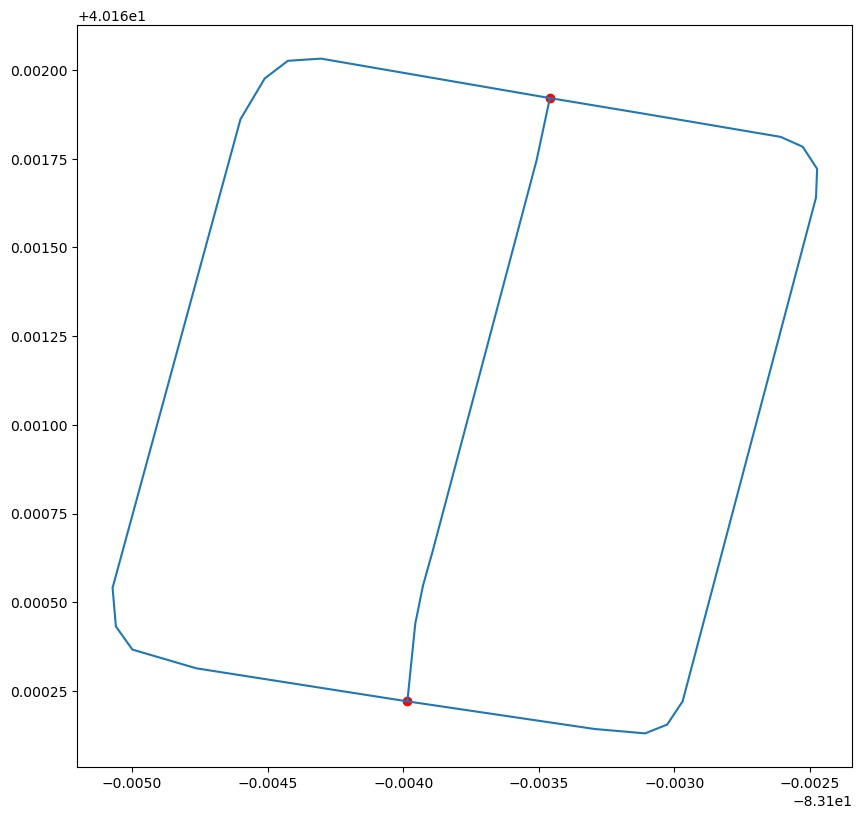

In [81]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
node_gdf.loc[[4988483513, 4988485224]].plot(ax=ax, color='red')
edge_gdf.loc[[(4988483513, 4988485224, 0),(4988483513, 4988485224, 1),(4988483513, 4988485224, 2)]].plot(ax=ax)

In [53]:
m = None
m = AOI_gdf.explore(name="AOI Boundary", popup=False,tooltip=False, style_kwds={'fill': False, "color": "grey", "weight": 3, "opacity": 0.95})
m = edge_gdf.explore(m=m, name="Road", style_kwds={"color":"orange", "weight":3, "opacity":0.7})
m = node_gdf.explore(m=m, name="Node", color="red", marker_kwds={"radius": 2})

folium.LayerControl(collapsed=False).add_to(m)
m